In [1]:
%matplotlib inline

In [2]:
import pandas as pd

In [3]:
final_df= pd.read_csv('C:/Users/D4/Documents/GitHub/Tarea2-IA/TData/clean_compras.csv')

In [4]:
final_df.head(4)

,C B,BENEFICIARIO,RFC,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO - #OP,FECHA,IMPORTE,SHEET
0,123803,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,CIC710521SA1,P 1214-185004-4,SIS-172-2022,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...,TR,1025275.0,2023-01-30 00:00:00.000000000,389093.21,OBRA PUBLICA Y GV FDOS. ESP
1,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000760-183001-8,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...,TR,1025278.0,2023-01-30 00:00:00.000000000,6564.00,OBRA PUBLICA Y GV FDOS. ESP
2,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,124000771-183001-7,NO APLICA,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...,TR,1025279.0,2023-01-30 00:00:00.000000000,6418.00,OBRA PUBLICA Y GV FDOS. ESP
3,206273,TESORERIA DE LA FEDERACION,SAT970701NN3,183006-1,NO APLICA,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...,TR,332000144.0,2023-01-30 00:00:00.000000000,110220.65,OBRA PUBLICA Y GV FDOS. ESP


#visión general del Dataset

In [5]:
final_df.columns

Index(['C B', 'BENEFICIARIO', 'RFC', 'FACTURAS', 'CONTRATO', 'CONCEPTO',
       'TIPO', 'FDO - #OP', 'FECHA', 'IMPORTE', 'SHEET'],
      dtype='object')

In [6]:
final_df.dtypes

C B               int64
BENEFICIARIO     object
RFC              object
FACTURAS         object
CONTRATO         object
CONCEPTO         object
TIPO             object
FDO - #OP       float64
FECHA            object
IMPORTE         float64
SHEET            object
dtype: object

In [7]:
final_df.describe()

,C B,FDO - #OP,IMPORTE
count,17530.000000,1.753000e+04,1.753000e+04
mean,230356.014375,1.682974e+08,4.680773e+05
std,97400.825610,1.737286e+08,2.426644e+06
min,110036.000000,1.025264e+06,1.000000e+00
25%,120642.000000,1.027496e+06,3.857370e+03
50%,214873.000000,1.110585e+06,1.972144e+04
75%,318536.000000,3.510004e+08,1.189144e+05
max,999999.000000,6.040001e+08,1.013855e+08


In [8]:
final_df= final_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'TIPO', 'FECHA', 'IMPORTE', 'SHEET', 'CONCEPTO']]

In [9]:
final_df.head(4)

,BENEFICIARIO,FACTURAS,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO
0,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,P 1214-185004-4,SIS-172-2022,TR,2023-01-30 00:00:00.000000000,389093.21,OBRA PUBLICA Y GV FDOS. ESP,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...
1,TESORERIA DE LA FEDERACION,124000760-183001-8,NO APLICA,TR,2023-01-30 00:00:00.000000000,6564.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...
2,TESORERIA DE LA FEDERACION,124000771-183001-7,NO APLICA,TR,2023-01-30 00:00:00.000000000,6418.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...
3,TESORERIA DE LA FEDERACION,183006-1,NO APLICA,TR,2023-01-30 00:00:00.000000000,110220.65,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...


#analisis unidimensional

In [10]:
final_df['SHEET'].value_counts()

SHEET
OBRA PUBLICA Y GV FDOS. ESP    9141
GTS VARIOS                     3100
GTOS VARIOS                    1859
SERV PERS                      1786
COMUNICACION                    514
COMUNIC                         483
CUMUNICACION                    257
SERV PROF                       247
SER PROF                         75
GTS REPRESENT                    58
GTS REPRE                        10
Name: count, dtype: int64

In [11]:
final_df['SHEET'] = final_df['SHEET'].replace('GTS VARIOS', 'GTOS VARIOS')
final_df['SHEET'] = final_df['SHEET'].replace('COMUNICACION', 'COMUNIC')
final_df['SHEET'] = final_df['SHEET'].replace('CUMUNICACION', 'COMUNIC')
final_df['SHEET'] = final_df['SHEET'].replace('SER PROF', 'SERV PROF')
final_df['SHEET'] = final_df['SHEET'].replace('GTS REPRESENT', 'GTS REPRE')

In [12]:
final_df['SHEET'].unique()

array(['OBRA PUBLICA Y GV FDOS. ESP', 'GTOS VARIOS', 'SERV PROF',
       'SERV PERS', 'COMUNIC', 'GTS REPRE'], dtype=object)

In [13]:
final_df['BENEFICIARIO'].value_counts()[0:10]

BENEFICIARIO
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION    3018
CAR ONE MONTERREY, S.A. DE C.V.                        533
INTERASFALTOS, S.A. DE C.V.                            451
MOTO SOLUCIONES MEXICO, S.A. DE C.V.                   325
MUNICIPIO DE LA CIUDAD DE MONTERREY                    252
SUPERLLANTAS SANTO DOMINGO, S.A. DE C.V.               233
EDITORA EL SOL, S.A. DE C.V.                           209
HISA FARMACEUTICA, S.A. DE C.V.                        199
GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN                182
HOSPITAL SAN FELIPE DE JESUS S.C.                      166
Name: count, dtype: int64

<Axes: >

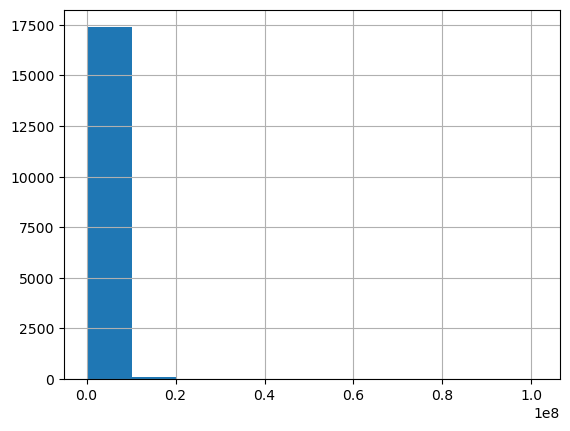

In [14]:
final_df['IMPORTE'].hist()

<Axes: >

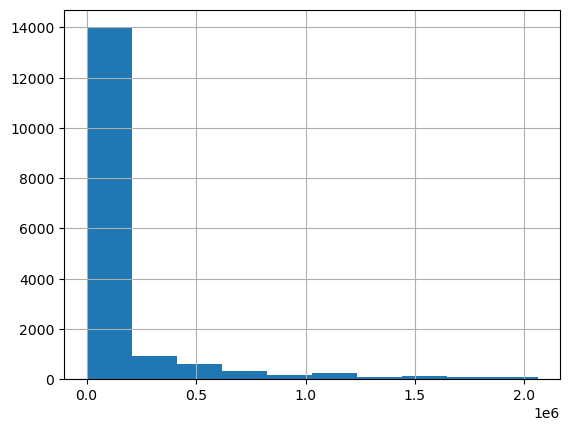

In [15]:
final_df[final_df['IMPORTE']< final_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<Axes: >

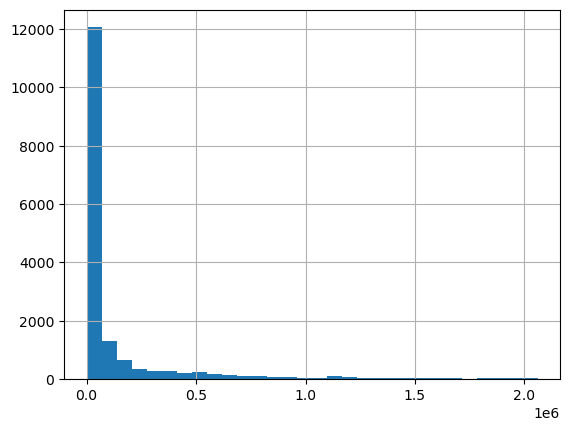

In [39]:
final_df[final_df['IMPORTE']< final_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=30)

In [17]:
final_df[final_df['IMPORTE']< final_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURAS,CONTRATO,TIPO,FECHA,IMPORTE,SHEET,CONCEPTO
0,COLEGIO DE INGENIEROS CIVILES DE NUEVO LEON AC,P 1214-185004-4,SIS-172-2022,TR,2023-01-30 00:00:00.000000000,389093.21,OBRA PUBLICA Y GV FDOS. ESP,RP-2023 30% ANT. SRSIS-RP-06/22-IR 1)LEV. TOPO...
1,TESORERIA DE LA FEDERACION,124000760-183001-8,NO APLICA,TR,2023-01-30 00:00:00.000000000,6564.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SECRETARIA DE I...
2,TESORERIA DE LA FEDERACION,124000771-183001-7,NO APLICA,TR,2023-01-30 00:00:00.000000000,6418.00,OBRA PUBLICA Y GV FDOS. ESP,PAGO DE DERECHOS A FAVOR DE LA SRIA. DE INFRAE...
3,TESORERIA DE LA FEDERACION,183006-1,NO APLICA,TR,2023-01-30 00:00:00.000000000,110220.65,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DEL IMPORTE NO COMPROMETIDO AL 31 DE...
4,TESORERIA DE LA FEDERACION,183006-2,NO APLICA,TR,2023-01-30 00:00:00.000000000,400123.00,OBRA PUBLICA Y GV FDOS. ESP,REINTEGRO DE PRODUCTOS FINANCIEROS AL 31 DE DI...


In [18]:
##Analisis multidimensional

In [19]:
sum_importe_beneficiario=final_df.groupby('BENEFICIARIO').sum()['IMPORTE']

In [20]:
sum_importe_beneficiario.head(5)

BENEFICIARIO
50 PRODUCCIONES, S.A DE C.V         11422.09
8ENRED, S DE R.L. DE C.V.          638000.00
A&T IMPORTACIONES, S.A. DE C.V.    353808.40
ABREGO TORRES CAROLINA              12995.90
ABUNDIS  ALBERTO                   479431.23
Name: IMPORTE, dtype: float64

<Axes: xlabel='BENEFICIARIO'>

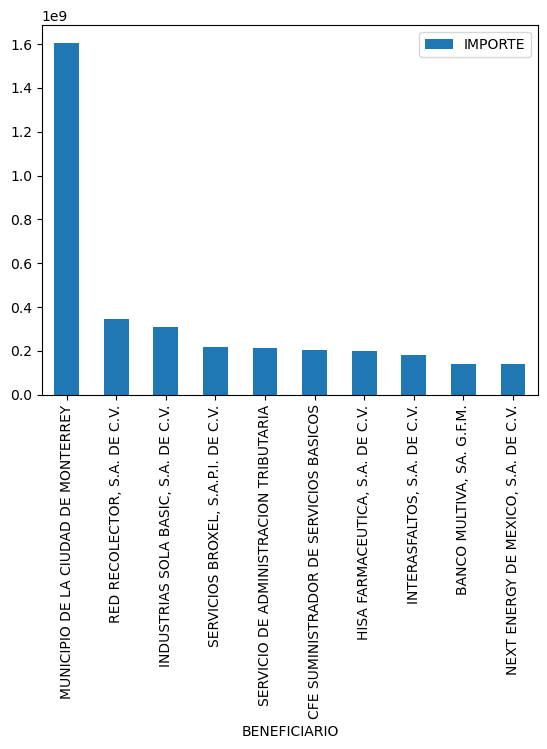

In [21]:
sum_importe_beneficiario.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO',y='IMPORTE')

In [22]:
mean_importe_sheet=final_df.groupby('SHEET')['IMPORTE'].mean()

In [23]:
mean_importe_sheet.head(4)

SHEET
COMUNIC                         80067.088740
GTOS VARIOS                    785180.299484
GTS REPRE                       19681.846324
OBRA PUBLICA Y GV FDOS. ESP    433899.519719
Name: IMPORTE, dtype: float64

<Axes: xlabel='SHEET'>

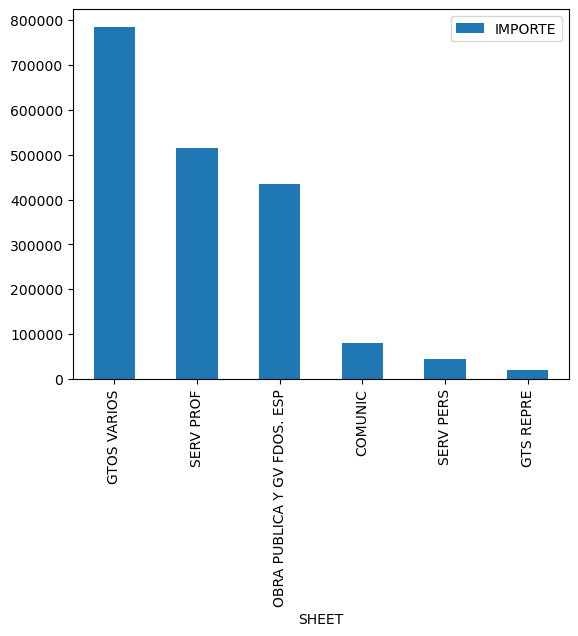

In [24]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET',y='IMPORTE')

In [25]:
sum_importe_fecha=final_df.groupby('FECHA').sum()['IMPORTE']

<Axes: xlabel='FECHA'>

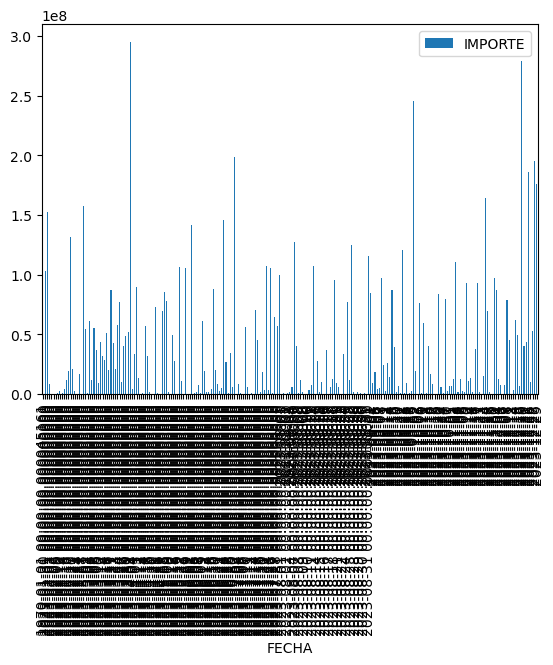

In [26]:
sum_importe_fecha.reset_index().sort_values(by='FECHA', ascending=True).plot(kind='bar', x='FECHA',y='IMPORTE')

# análisis de texto

In [27]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\D4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [29]:
texto_compras=''

In [30]:
for row in final_df['CONCEPTO']:
    texto_compras=texto_compras+ ' '+ row

In [35]:
stopwords_list= stopwords.words('spanish')+['2023', 'cont', 'millar', 'dpp', 'diciembre','municipio', 'león', 'nuevo', 'monterrey']

In [36]:
texto_compras = ' '.join([x for x in texto_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [37]:
wc = WordCloud(background_color= 'white')
wc.generate(texto_compras)

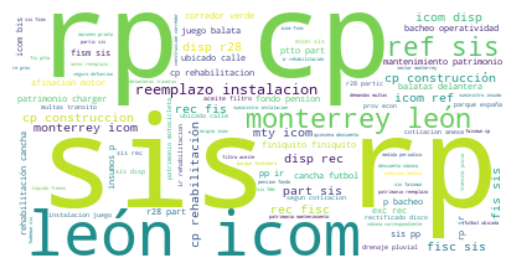

In [38]:
plt.axis("off")
plt.imshow(wc, interpolation='bilinear')
plt.show()